In [62]:
import pandas as pd

# Load the CSV file
file_path = "C:/Users/acer/Downloads/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
data = pd.read_csv(file_path)




In [63]:
print(data.head())
print(data.info())
print(data.describe())


   YearStart  YearEnd LocationAbbr LocationDesc  \
0       2020     2020           US     National   
1       2014     2014           GU         Guam   
2       2013     2013           US     National   
3       2013     2013           US     National   
4       2015     2015           US     National   

                                   Datasource                    Class  \
0  Behavioral Risk Factor Surveillance System        Physical Activity   
1  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
3  Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
4  Behavioral Risk Factor Surveillance System        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                     

In [64]:
#Drop unnecessary columns
data = data.drop(['Datasource', 'Data_Value_Unit', 'Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Total','YearEnd'], axis=1)

In [65]:
print(data.head())

   YearStart LocationAbbr LocationDesc                    Class  \
0       2020           US     National        Physical Activity   
1       2014           GU         Guam  Obesity / Weight Status   
2       2013           US     National  Obesity / Weight Status   
3       2013           US     National  Obesity / Weight Status   
4       2015           US     National        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                            Question  Data_Value  \
0  Percent of adults who engage in no leisure-tim...        30.6   
1  Percent of adults aged 18 years and older who ...        29.3   
2  Percent of adults aged 18 years and older who ...        28.8   
3  Percent of adults aged 18 years and older who ...        32.7   
4  Percent of adults who achieve at least 300 

In [66]:
#Rename the column name
data.rename(columns={'YearStart': 'Year'}, inplace=True)
print(data.head())

   Year LocationAbbr LocationDesc                    Class  \
0  2020           US     National        Physical Activity   
1  2014           GU         Guam  Obesity / Weight Status   
2  2013           US     National  Obesity / Weight Status   
3  2013           US     National  Obesity / Weight Status   
4  2015           US     National        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                            Question  Data_Value  \
0  Percent of adults who engage in no leisure-tim...        30.6   
1  Percent of adults aged 18 years and older who ...        29.3   
2  Percent of adults aged 18 years and older who ...        28.8   
3  Percent of adults aged 18 years and older who ...        32.7   
4  Percent of adults who achieve at least 300 min...        26.6   

   Low_

In [67]:
# Check for missing values
print(data.isnull().sum())

Year                             0
LocationAbbr                     0
LocationDesc                     0
Class                            0
Topic                            0
Question                         0
Data_Value                    9235
Low_Confidence_Limit          9235
High_Confidence_Limit         9235
Sample_Size                   9235
Age(years)                   73269
Education                    79929
Gender                       86589
Income                       69939
Race/Ethnicity               66609
GeoLocation                   1736
ClassID                          0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
LocationID                       0
StratificationCategory1          9
Stratification1                  9
StratificationCategoryId1        9
StratificationID1                9
dtype: int64


In [68]:
data.fillna('NULL', inplace=True)

In [69]:
print(data.head())

   Year LocationAbbr LocationDesc                    Class  \
0  2020           US     National        Physical Activity   
1  2014           GU         Guam  Obesity / Weight Status   
2  2013           US     National  Obesity / Weight Status   
3  2013           US     National  Obesity / Weight Status   
4  2015           US     National        Physical Activity   

                          Topic  \
0  Physical Activity - Behavior   
1       Obesity / Weight Status   
2       Obesity / Weight Status   
3       Obesity / Weight Status   
4  Physical Activity - Behavior   

                                            Question Data_Value  \
0  Percent of adults who engage in no leisure-tim...       30.6   
1  Percent of adults aged 18 years and older who ...       29.3   
2  Percent of adults aged 18 years and older who ...       28.8   
3  Percent of adults aged 18 years and older who ...       32.7   
4  Percent of adults who achieve at least 300 min...       26.6   

  Low_Confide

In [50]:
#Save the clean dataset
data.to_csv("C:/Users/acer/Downloads/nutrition_data.csv", index=False)

In [70]:
path = "C:/Users/acer/Downloads/nutrition_data.csv"
clean_data = pd.read_csv(path)

In [71]:
# Filter the data for obesity-related questions and where stratification is by education
obesity_education_data =  clean_data[
    (clean_data['Class'] == 'Obesity / Weight Status') &
    (clean_data['StratificationCategory1'] == 'Education')
]



In [72]:
# Check if the data includes specific questions about prevalence, or else list questions
print(obesity_education_data['Question'].unique())



['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification']


In [73]:
# Check the data type of 'Data_Value'
print(obesity_education_data['Data_Value'].dtype)

# If it's not numeric, convert it
if not pd.api.types.is_numeric_dtype(obesity_education_data['Data_Value']):
    obesity_education_data['Data_Value'] = pd.to_numeric(obesity_education_data['Data_Value'], errors='coerce')


float64


In [74]:
pivot_table = obesity_education_data.pivot_table(
    values='Data_Value',
    index='Year',
    columns='Stratification1',
    aggfunc='mean'
)
print(pivot_table)




Stratification1  College graduate  High school graduate  \
Year                                                      
2011                    29.301923             32.778846   
2012                    29.552885             33.050000   
2013                    29.796226             33.158491   
2014                    30.065741             33.250000   
2015                    30.262037             33.369444   
2016                    30.552727             33.237273   
2017                    30.937037             33.780556   
2018                    31.316667             33.801852   
2019                    31.728302             34.138679   
2020                    31.609259             33.994444   
2021                    32.332407             34.476852   
2022                    32.734545             34.269091   

Stratification1  Less than high school  Some college or technical school  
Year                                                                      
2011                   

In [76]:
# Calculate the correlation matrix
correlation_matrix = pivot_table.corr()



In [77]:
# Display the correlation matrix
correlation_matrix

Stratification1,College graduate,High school graduate,Less than high school,Some college or technical school
Stratification1,,,,
College graduate,1.000000,0.971158,0.883151,0.994806
High school graduate,0.971158,1.000000,0.879299,0.966473
Less than high school,0.883151,0.879299,1.000000,0.899499
Some college or technical school,0.994806,0.966473,0.899499,1.000000


In [78]:
import matplotlib.pyplot as plt




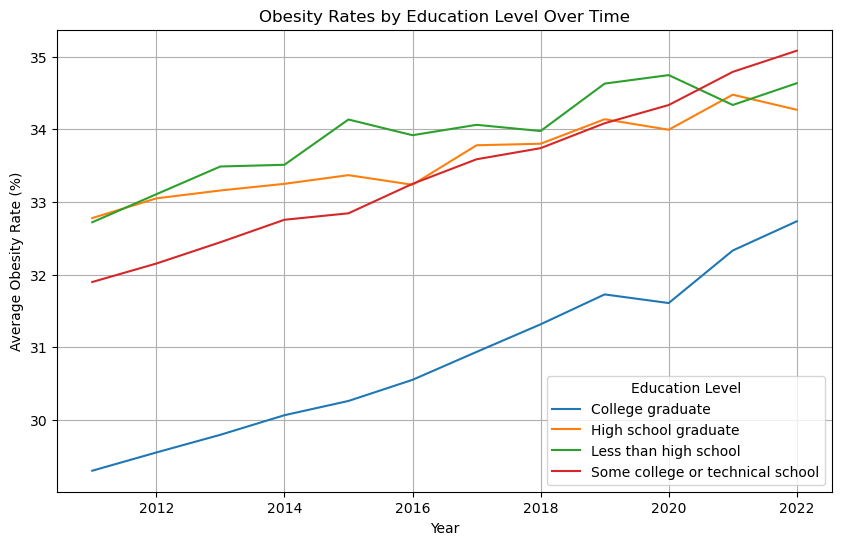

In [79]:
# Create a line plot to visualize obesity trends by education level
plt.figure(figsize=(10, 6))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], label=column)

plt.title('Obesity Rates by Education Level Over Time')
plt.xlabel('Year')
plt.ylabel('Average Obesity Rate (%)')
plt.legend(title='Education Level')
plt.grid(True)
plt.show()